*SVC*

SVC là một loại mô hình học máy thuộc lớp học máy với giám sát, được sử dụng cho bài toán phân loại. SVC là viết tắt của "Support Vector Classifier" hoặc "Support Vector Classification".

*Đây là một số điểm quan trọng về SVC:*

- Hỗ trợ Vector: SVC dựa vào hỗ trợ vector để phân loại các điểm dữ liệu vào các lớp khác nhau. Hỗ trợ vector là các điểm dữ liệu mà nằm gần nhất với ranh giới quyết định (decision boundary) giữa các lớp.

- Phân loại đa lớp: SVC có thể được sử dụng cho các bài toán phân loại với nhiều lớp (multiclass classification) bằng cách sử dụng các kỹ thuật như One-vs-One hoặc One-vs-All.

- Hàm mất mát: SVC cố gắng tối ưu hóa một hàm mất mát (loss function), thường là hàm mất mát Hinge, để tìm ra một ranh giới quyết định tối ưu.

- Tối ưu hóa: Một trong những ưu điểm của SVC là khả năng tối ưu hóa hiệu quả trong không gian đặc trưng cao chiều (high-dimensional feature spaces) thông qua việc sử dụng các kỹ thuật như kernel trick.

- Hạt nhân (Kernel): SVC cho phép sử dụng các hàm hạt nhân để chuyển đổi dữ liệu vào các không gian khác nhau để tìm ra một ranh giới quyết định phân loại tốt hơn.

- Cài đặt trong các thư viện học máy: SVC được triển khai trong các thư viện phổ biến như Scikit-learn trong Python và LIBSVM trong C/C++.















In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay


In [56]:

data = pd.read_csv('D:/2024/khaiphadulieu/final/DataPreporocessing/tranning_data.csv')

# Assume the last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [57]:
data.head(5)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,HadHeartAttack
0,-15.109970,6.031999,0.438462,2.547293,-0.827609,-0.307119,0.109011,-1.638021,0.926200,-0.751768,...,-0.191913,0.248061,-0.168218,0.019242,-0.096268,0.176926,-0.037407,-0.111460,0.044458,0
1,-15.044608,6.051794,-2.616730,-3.973544,-0.376247,0.186020,1.486749,-0.571280,-0.244716,-1.133013,...,-0.346983,0.007719,-0.214735,0.435704,-0.659643,-0.117809,0.026725,-0.309067,-0.136708,0
2,-14.997394,5.501777,-2.352792,-3.794706,-0.595373,-0.019866,-1.209146,0.316478,-0.380944,0.457354,...,-0.574467,-0.671132,-0.252618,-0.164043,0.010531,0.337231,-0.061646,-0.154560,0.054877,1
3,-14.997394,5.501777,-2.352792,-3.794706,-0.595373,-0.019866,-1.209146,0.316478,-0.380944,0.457354,...,-0.574467,-0.671132,-0.252618,-0.164043,0.010531,0.337231,-0.061646,-0.154560,0.054877,1
4,-14.908467,5.666215,1.407435,4.374798,-0.867754,0.295491,0.012870,0.750792,-0.217351,0.678462,...,0.113034,0.027275,-0.217452,0.142748,0.021218,0.090048,0.001196,-0.040316,0.052575,0


Các Keys của data 

In [58]:
data.keys()

Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19', 'pca20', 'HadHeartAttack'],
      dtype='object')

Dùng để hiện thị một tóm tắt ngắn gọn về cấu trúc và thông tin của một DataFrame data

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61128 entries, 0 to 61127
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pca1            61128 non-null  float64
 1   pca2            61128 non-null  float64
 2   pca3            61128 non-null  float64
 3   pca4            61128 non-null  float64
 4   pca5            61128 non-null  float64
 5   pca6            61128 non-null  float64
 6   pca7            61128 non-null  float64
 7   pca8            61128 non-null  float64
 8   pca9            61128 non-null  float64
 9   pca10           61128 non-null  float64
 10  pca11           61128 non-null  float64
 11  pca12           61128 non-null  float64
 12  pca13           61128 non-null  float64
 13  pca14           61128 non-null  float64
 14  pca15           61128 non-null  float64
 15  pca16           61128 non-null  float64
 16  pca17           61128 non-null  float64
 17  pca18           61128 non-null 

In [60]:
data['HadHeartAttack'].value_counts()

HadHeartAttack
0    30564
1    30564
Name: count, dtype: int64

<Axes: xlabel='HadHeartAttack', ylabel='count'>

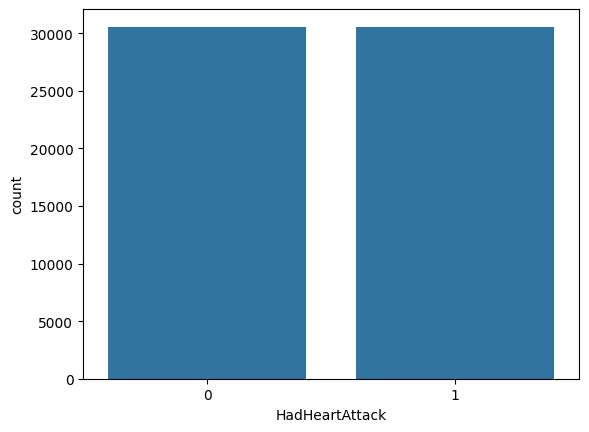

In [61]:
sns.countplot(data = data, x = 'HadHeartAttack')

In [62]:
data.corr()['HadHeartAttack'].sort_values(ascending = False)

HadHeartAttack    1.000000
pca7              0.301034
pca16             0.212427
pca12             0.208606
pca1              0.182639
pca2              0.071373
pca15             0.052640
pca20             0.035019
pca5              0.029094
pca19             0.007254
pca18            -0.002478
pca10            -0.003476
pca14            -0.017914
pca9             -0.019230
pca11            -0.035228
pca6             -0.040014
pca17            -0.090890
pca8             -0.120762
pca13            -0.187478
pca4             -0.242275
pca3             -0.268991
Name: HadHeartAttack, dtype: float64

<Axes: >

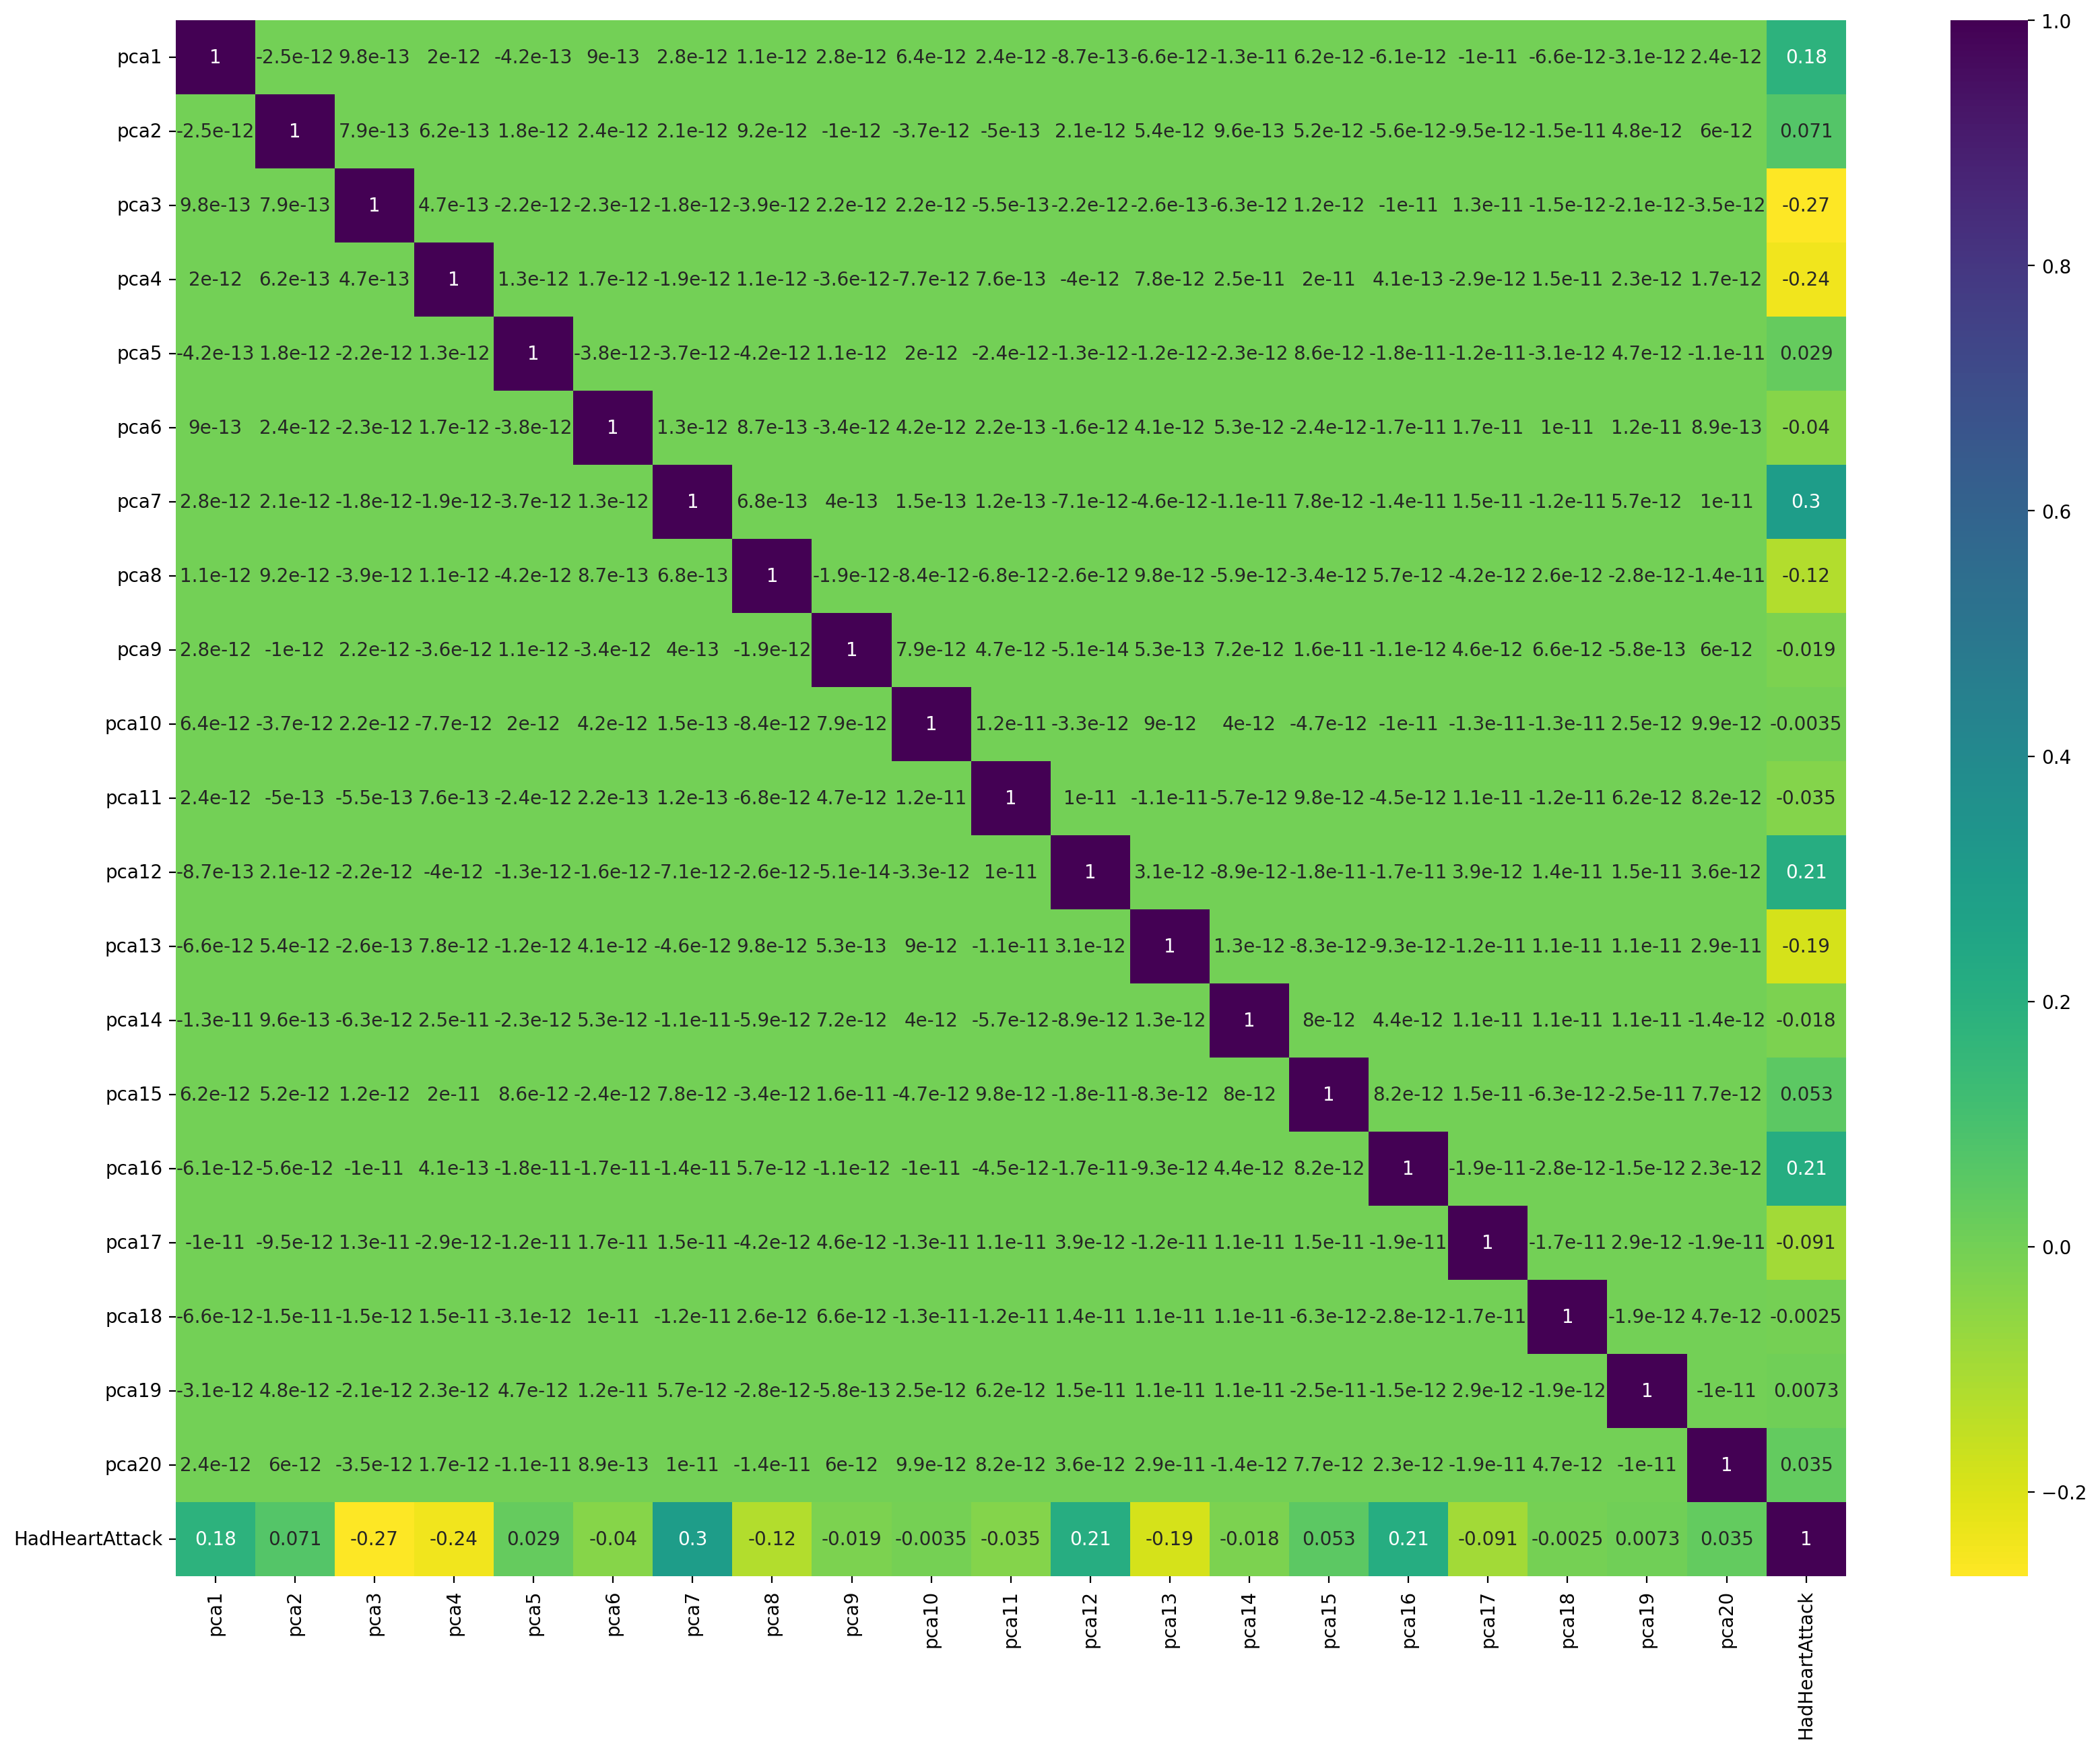

In [63]:
plt.figure(figsize =(20,15), dpi = 200)
sns.heatmap(data.corr(), annot = True,cmap ='viridis_r')

*X*: Ma trận chứa các đặc trưng (features) của dữ liệu.

*y*: Mảng chứa nhãn (labels) tương ứng với các mẫu dữ liệu trong X.

*test_size=0.3*: Xác định tỉ lệ dữ liệu sẽ được sử dụng làm tập kiểm tra. Trong trường hợp này, 30% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 70% còn lại sẽ được sử dụng cho tập huấn luyện.

*random_state=42*: Thiết lập hạt giống (seed) cho bộ sinh số ngẫu nhiên để đảm bảo kết quả phân chia dữ liệu có thể tái lập được. Sử dụng một giá trị cố định (ở đây là 42) đảm bảo rằng mỗi lần bạn chạy mã này, bạn sẽ nhận được cùng một cách phân chia dữ liệu.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


*StandardScaler* là một công cụ từ Scikit-learn để chuẩn hóa dữ liệu. Nó chuyển đổi dữ liệu để có giá trị trung bình là 0 và độ lệch chuẩn là 1.


*fit_transform(X_train)*:
    fit: Tính toán giá trị trung bình và độ lệch chuẩn từ dữ liệu huấn luyện X_train.
    transform: Sử dụng các giá trị trung bình và độ lệch chuẩn vừa tính được để chuẩn hóa dữ liệu X_train.
    Kết quả là X_train sẽ có giá trị trung bình là 0 và độ lệch chuẩn là 1.

*transform(X_test)*:
    Sử dụng các giá trị trung bình và độ lệch chuẩn đã được tính từ dữ liệu huấn luyện để chuẩn hóa dữ liệu kiểm tra X_test.

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Grid search

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

<h3>C: Hệ số điều chỉnh (regularization parameter).</h3>

<p style="font-size:20px;">C: Quy định mức phạt cho lỗi phân loại. Giá trị lớn hơn của C cố gắng giảm lỗi huấn luyện, có thể dẫn đến overfitting. Giá trị nhỏ hơn của C sẽ tăng độ khái quát hóa của mô hình.
    Các giá trị được thử nghiệm: [0.1, 10, 100].
</p>
    

<h3>gamma: Tham số cho các hàm kernel phi tuyến.</h3>

<p style="font-size:20px;">gamma: Quy định mức độ ảnh hưởng của một điểm dữ liệu duy nhất. Giá trị nhỏ hơn của gamma nghĩa là điểm dữ liệu có tầm ảnh hưởng lớn hơn và ngược lại.
    Các giá trị được thử nghiệm: [0.01, 0.1, 1].</p>
    


<h3>kernel: Loại hàm kernel được sử dụng bởi SVM.</h3>

<p style="font-size:20px;">     kernel: Quyết định hàm kernel nào được sử dụng để chuyển đổi không gian đặc trưng của dữ liệu.
    Các giá trị được thử nghiệm: ['linear', 'sigmoid', None].
        'linear': Sử dụng hàm kernel tuyến tính.
        'sigmoid': Sử dụng hàm kernel sigmoid.
        None: Điều này dường như là một lỗi vì kernel không thể là None. Nên thay bằng 'rbf', 'poly', hoặc loại kernel khác hợp lệ.</p>
    

In [68]:
para = {
    'C': [0.1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'sigmoid', None]
}

<h2>Khởi tạo GridSearchCV</h2>

In [69]:
grid = GridSearchCV(SVC(), para, cv = 2, scoring = 'precision')

<h2>Thực hiện tìm kiếm Grid Search</h2>

In [70]:
grid.fit(X_train, y_train)

c:\Users\vu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'sigmoid', None]},
             scoring='precision')

<h2>Truy xuất và in ra các siêu tham số tốt nhất</h2>

In [83]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}

<h2>Truy xuất và in ra mô hình tốt nhất</h2>

In [84]:
grid.best_estimator_
best_model = grid.best_estimator_

<h2>Dự đoán nhãn cho tập kiểm tra</h2>

In [85]:
predictions = grid.predict(X_test)

<h2>In ra báo cáo phân loại</h2>

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      9248
           1       0.86      0.67      0.76      9091

    accuracy                           0.79     18339
   macro avg       0.80      0.78      0.78     18339
weighted avg       0.80      0.79      0.78     18339



<h2>Lưu mô hình tốt nhất vào một file</h2>

In [87]:
import joblib


joblib_file = "./svc.pkl"
joblib.dump(best_model, joblib_file)

print(f'Model saved to {joblib_file}')

Model saved to ./svc.pkl
